In [1]:
%pip install --quiet chromadb langchain langchain_chroma langchain_experimental
%pip install --quiet protobuf==3.20.2



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
from IPython.display import HTML, display

def plt_img_base64(img_base64):
  """Display base64 encoded string as image"""

  # Create an HTML img tag with the base64 string as the source
  image_html = f'<img width="200px" height="200px" src="data:image/jpeg;base64,{img_base64}" />'
  display(HTML(image_html))
  

In [3]:
import json
import os
from pathlib import Path
from langchain_chroma import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings

images_path = "../initial-training-sets/datasets/images"

# OpenCLIP: https://github.com/mlfoundations/open_clip
# Larger and more performant
model_name = "ViT-g-14"
checkpoint = "laion2b_s34b_b88k"

# # Smaller less performant
# model_name = "ViT-B-32"
# checkpoint = "laion2b_s34b_b79k"

# # Default
# model_name = "ViT-H-14",
# checkpoint = "laion2b_s32b_b79k"

image_vectorstore = Chroma(
    collection_name="playground", 
    embedding_function=OpenCLIPEmbeddings(model=None, preprocess=None, tokenizer=None, model_name=model_name, checkpoint=checkpoint)
)



/home/solomon/Documents/projects/ciam2rag/ciam2rag_core/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
open_clip_pytorch_model.bin: 100%|██████████| 5.47G/5.47G [02:47<00:00, 32.6MB/s]


In [4]:

products_path = "../initial-training-sets/datasets/dataset_products.json"

products_data = json.loads(Path(products_path).read_text())
products = products_data['MEN_FASHION_WITH_REVIEWS']['products'][0:10]

In [5]:

image_uris = [ os.path.join(images_path, image_path) for image_path in os.listdir(images_path)[0:10] ]

In [6]:
image_vectorstore.add_images(uris=image_uris)

['612297f1-b64f-4075-95c7-b212966a9455',
 '9b6ead0a-ca72-42e7-a3e0-b0602c6b997d',
 '4217ff29-7a9d-4a90-9345-990cc898ad36',
 '2ff74b10-9ced-4072-bfd5-3e2a51c7f2b7',
 '2ccd40f2-ab0a-4630-911a-3adf7993c650',
 '8f858fea-356b-4bbc-942e-ce2cd40a1ed7',
 '1e4da5a4-46e2-4285-83c9-0f1750e3bb55',
 'fd14ccbb-9c1e-47d7-bc52-c70bd4facaa0',
 'dd21304e-f32f-4ad7-bd12-c3a620bf74b7',
 '46b8de20-e0ea-4fd4-a3a6-033259ce43ae']

Score: 1.6580519676208496



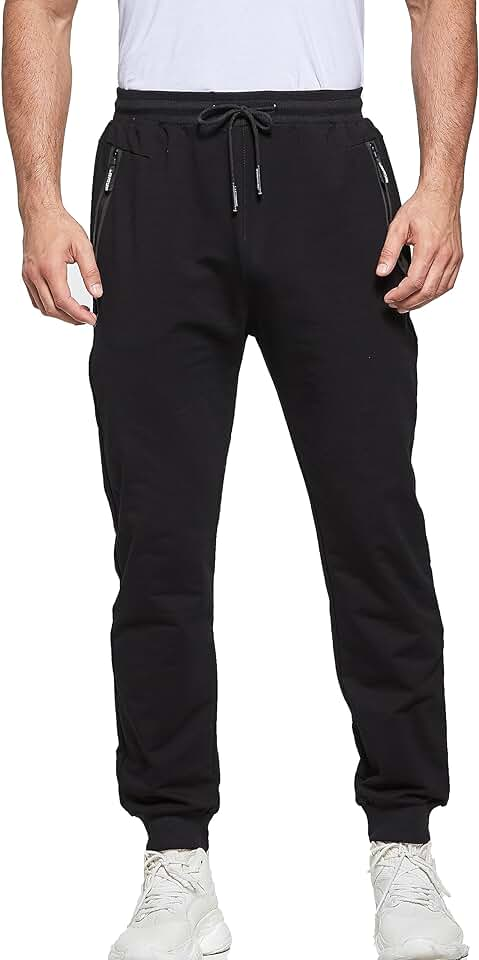





Score: 1.7884620428085327



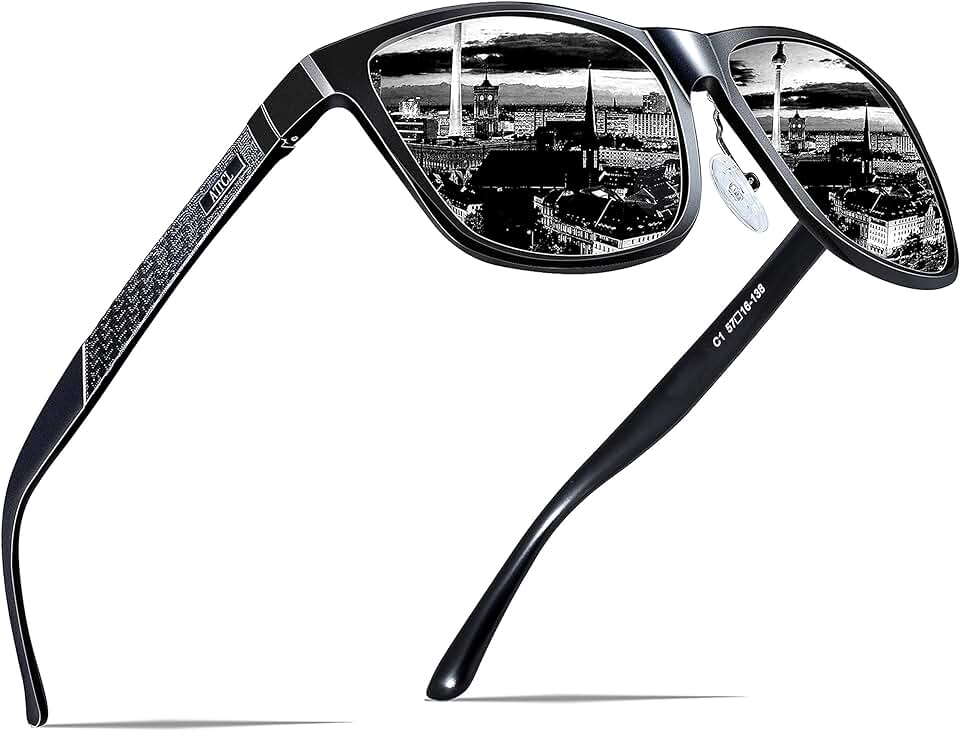

In [7]:
docs = image_vectorstore.similarity_search_with_score("jean for men", k=2)

for doc in docs:
    print(f"Score: {doc[1]}" )
    plt_img_base64(doc[0].page_content)
    print("\n\n\n")

Score: 1.6797579526901245



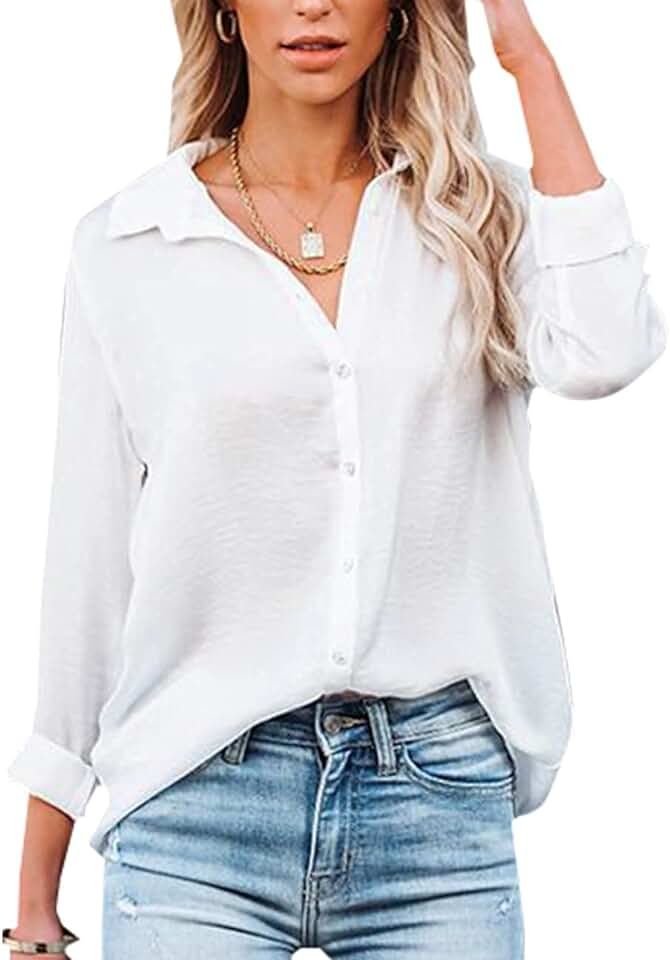





Score: 1.76189124584198



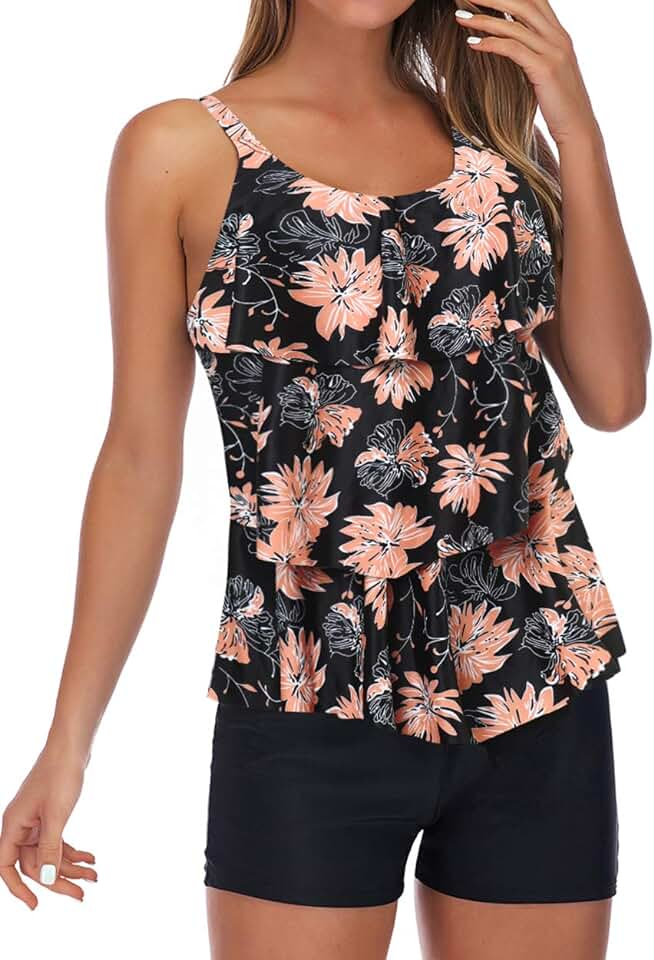

In [8]:
docs = image_vectorstore.similarity_search_with_score("jean for women", k=2)

for doc in docs:
    print(f"Score: {doc[1]}" )
    plt_img_base64(doc[0].page_content)
    print("\n\n\n")